<a href="https://colab.research.google.com/github/nadicika/PCVK/blob/main/Pertemuan7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Inthania Nadicika Kurniawan**

**Absen: 12**

**Kelas: TI-3C**

**MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point
Detection, Line Detection, Edge Detection**


###**Praktikum Filter**

**a. Melakukan sinkronisasi dengan akun drive yang dimiliki untuk mengakses dataset**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**b. Melakukan import library yang dibutuhkan untuk praktikum**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

**c. Membuat fungsi konvolusi**

In [33]:
# Membuat fungsi konvolusi
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

**d. Memuat citra yang akan diproses dan mengubahnya menjadi citra keabuan**

In [27]:
img = cv.imread('/content/drive/MyDrive/PCVK/my images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

**e. Menentukan kernel yang akan digunakan**

In [28]:
# Image Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

**f. Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan**

**SHARPEN**

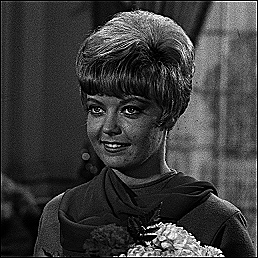

In [29]:
result_image = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(result_image)

**EMBOSS**

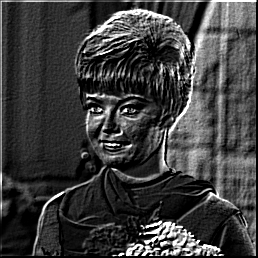

In [30]:
kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
result_image = convolution2d(img_gray,kernel_emboss,1,2)
cv2_imshow(result_image)

**Left Sobel Edge Detection**

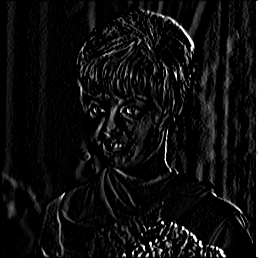

In [31]:
kernel_lsed = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
result_image = convolution2d(img_gray,kernel_lsed,1,2)
cv2_imshow(result_image)

**CANNY EDGE DETECTION**

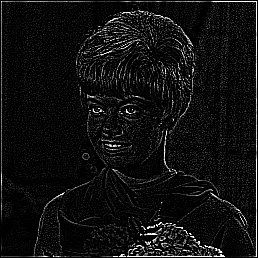

In [9]:
kernel_canny = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
result_image = convolution2d(img_gray,kernel_canny,1,2)
cv2_imshow(result_image)

**PREWITT EDGE DETECTION**

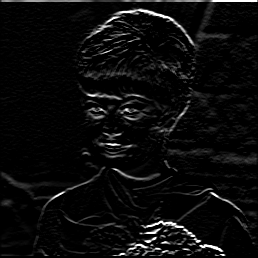

In [10]:
kernel_prewitt = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
result_image = convolution2d(img_gray,kernel_prewitt,1,2)
cv2_imshow(result_image)

**5x5 GAUSSIAN BLUR**

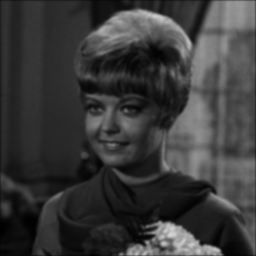

In [11]:
gaussian_blur_5_x_5 = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]], dtype=float)

gaussian_blur_5_x_5 /= 256

result_image = convolution2d(img_gray,gaussian_blur_5_x_5,1,2)
cv2_imshow(result_image)

**21x21 GAUSSIAN BLUR**

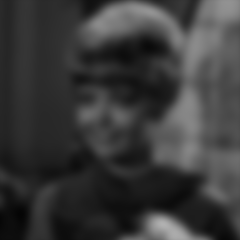

In [12]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size,sigma)
gaussian_blur_21 = gaussian_kernel @ gaussian_kernel.transpose()

result_image = convolution2d(img_gray,gaussian_blur_21,1,2)
cv2_imshow(result_image)

### **TUGAS PRAKTIKUM**

A. KTP SATU

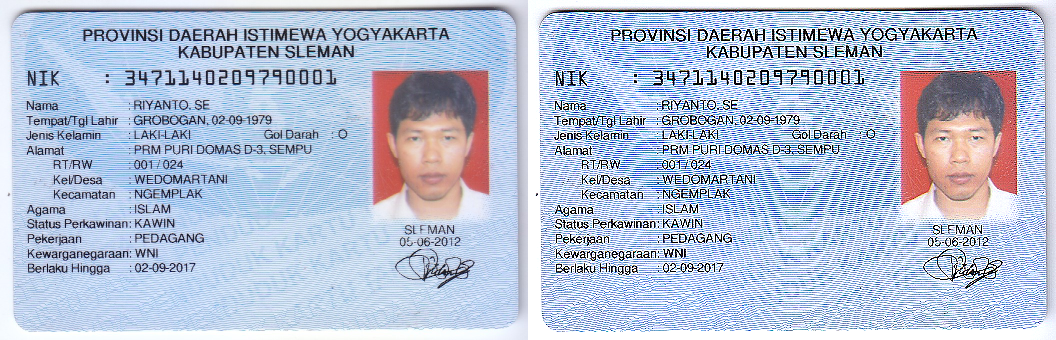

In [13]:
def contrast(image, alpha):
    contrasted_image = cv.convertScaleAbs(image, alpha=alpha, beta=0)
    return contrasted_image

ktp_asli = cv.imread('/content/drive/MyDrive/PCVK/my images/KTP_More/ktp.png')
ktp_1 = cv.resize(ktp_asli, (0,0), fx=0.5, fy=0.5)
contrast = contrast(ktp_1, 1.068)
img_result = cv.filter2D(contrast, -1, kernel_sharpen)
final_frame = cv.hconcat([ktp_1, img_result])
cv2_imshow(final_frame)

B. KTP DUA

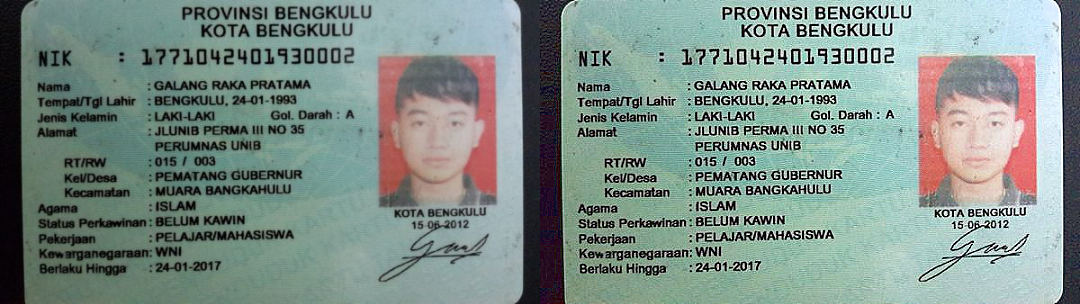

In [15]:
def contrast(image, alpha):
    contrasted_image = cv.convertScaleAbs(image, alpha=alpha, beta=0)
    return contrasted_image

def brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = np.where(v <= 255 - value, v + value, 255)
    brightened_hsv = cv.merge((h, s, v))
    brightened_image = cv.cvtColor(brightened_hsv, cv.COLOR_HSV2BGR)
    return brightened_image

ktp_asli = cv.imread('/content/drive/MyDrive/PCVK/my images/KTP_More/ktp1.png')
ktp_2 = cv.resize(ktp_asli, (0,0), fx=0.9, fy=0.9)
contrast = contrast(ktp_2, 1.068)
brightness = brightness(contrast, 30)
img_result = cv.filter2D(brightness, -1, kernel_sharpen)
final_frame = cv.hconcat([ktp_2, img_result])
cv2_imshow(final_frame)

C. KTP TIGA

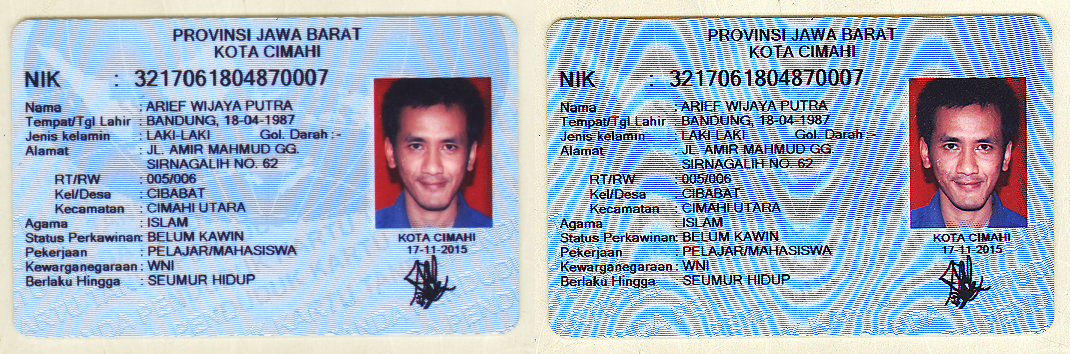

In [17]:
def contrast(image, alpha):
    contrasted_image = cv.convertScaleAbs(image, alpha=alpha, beta=0)
    return contrasted_image

ktp_asli = cv.imread('/content/drive/MyDrive/PCVK/my images/KTP_More/ktp2.png')
ktp_3 = cv.resize(ktp_asli, (0,0), fx=0.5, fy=0.5)
contrast = contrast(ktp_3, 1.032)
img_result = cv.filter2D(contrast, -1, kernel_sharpen)
final_frame = cv.hconcat([ktp_3, img_result])
cv2_imshow(final_frame)

D. KTP EMPAT

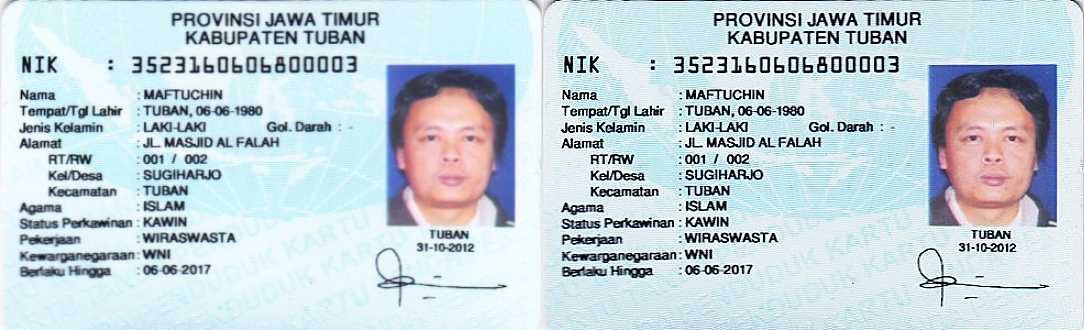

In [18]:
def minus_brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    h, s, v = cv.split(hsv)
    v = np.where(v >= value, v - value, 0)
    darkened_hsv = cv.merge((h, s, v))

    darkened_image = cv.cvtColor(darkened_hsv, cv.COLOR_HSV2BGR)

    return darkened_image

ktp_asli = cv.imread('/content/drive/MyDrive/PCVK/my images/KTP_More/ktp3.png')
ktp_4 = cv.resize(ktp_asli, (0,0), fx=1.1, fy=1.1)
brightness = minus_brightness(ktp_4, 12)
img_result = cv.filter2D(brightness, -1, kernel_sharpen)
final_frame = cv.hconcat([ktp_4, img_result])
cv2_imshow(final_frame)

E. KTP LIMA

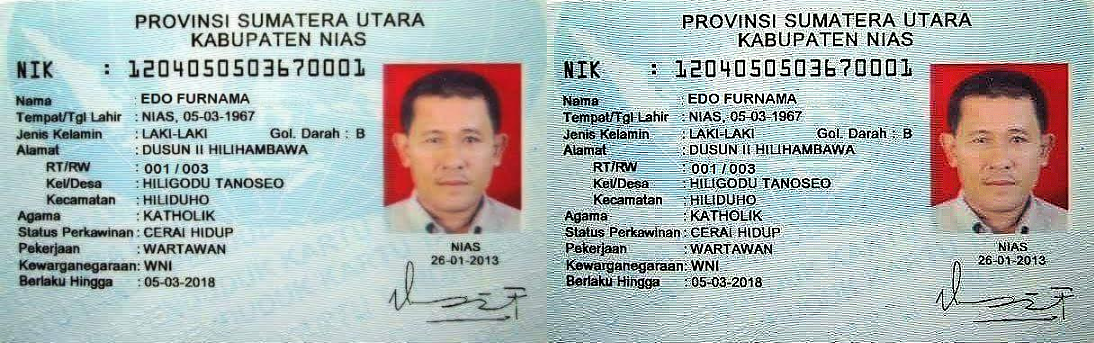

In [20]:
ktp_asli = cv.imread('/content/drive/MyDrive/PCVK/my images/KTP_More/ktp5.png')
ktp_5 = cv.resize(ktp_asli, (0,0), fx=0.9, fy=0.9)
brightness = minus_brightness(ktp_5, 10)
img_result = cv.filter2D(brightness, -1, kernel_sharpen)
final_frame = cv.hconcat([ktp_5, img_result])
cv2_imshow(final_frame)

F. KTP ENAM

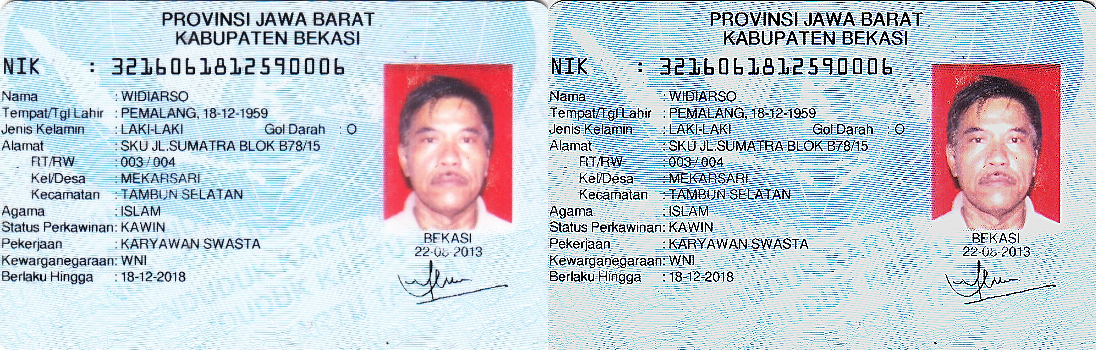

In [22]:
def contrast(image, alpha):
    contrasted_image = cv.convertScaleAbs(image, alpha=alpha, beta=0)
    return contrasted_image

ktp_asli = cv.imread('/content/drive/MyDrive/PCVK/my images/KTP_More/ktp6.png')
ktp_6 = cv.resize(ktp_asli, (0,0), fx=0.55, fy=0.55)
contrast = contrast(ktp_6, 1.065)
brightness = minus_brightness(contrast, 27)
img_result = cv.filter2D(brightness, -1, kernel_sharpen)
final_frame = cv.hconcat([ktp_6, img_result])
cv2_imshow(final_frame)

G. KTP TUJUH

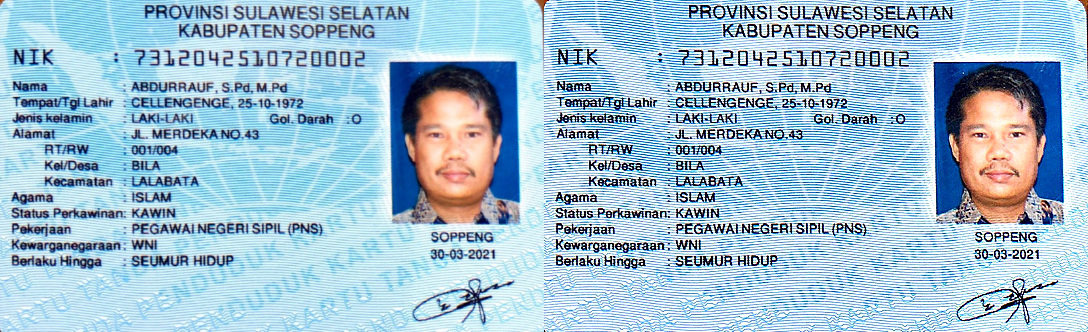

In [25]:
def contrast(image, alpha):
    contrasted_image = cv.convertScaleAbs(image, alpha=alpha, beta=0)
    return contrasted_image

ktp_asli = cv.imread('/content/drive/MyDrive/PCVK/my images/KTP_More/KTP7.jpeg')
ktp_7 = cv.resize(ktp_asli, (0,0), fx=0.68, fy=0.68)
contrast = contrast(ktp_7, 1.03)
img_result = cv.filter2D(contrast, -8, kernel_sharpen)
final_frame = cv.hconcat([ktp_7, img_result])
cv2_imshow(final_frame)